# Glacier Bay AIS tracks can serve as a guide to annotators in SPLAT

Load and collate AIS data with acoustic data. Use context to delimit expected audible bounds.

---

This notebook uses geoprocessing libraries which can result in version conflicts. It is highly recommended to create a fresh virtual environment: install `geopandas` first, then build up the necessary dependancies from there. *See import statements in `GLBA-vesselAcoustics\AIS_utilities.py` for full list of required libraries.*

---

It also uses a few specialized NPS libraries (`iyore`, `soundDB`). For the latter it's easiest to get the code directly from GitHub and import the necessary parser (`nvspl`) directly from the module. 

---

#### <font color="magenta"> TO DO </font>: 

- evaluate error due to propagation time

In [1]:
# # geoprocessing libraries
# import fiona
# from fiona.crs import from_epsg
# import pyproj
# import geopandas as gpd
# from shapely.ops import transform
# from shapely.geometry import mapping, Point, Polygon
# import rasterio
# import rasterio.mask
# from rasterio.plot import show

# # some 'everyday' libraries
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# import pandas as pd
# import numpy as np
# from functools import partial
# import datetime as dt
# import pytz
# import os
# import glob

import sys

# specialized NPS libraries
import iyore

sys.path.append(r"C:\Users\DBetchkal\PythonScripts\3 GITHUB REPOSITORIES\soundDB")
from soundDB import nvspl, srcid

sys.path.append(r"C:\Users\DBetchkal\PythonScripts\3 GITHUB REPOSITORIES\GLBA-vesselAcoustics")
from AIS_utilities import *


# This cell does quite a bit:

### (1) Load GPS data for a given deployment and detection distance

### (2) Plot the overlapping points within park context

### (3) Save a SRCID file that will help guide annotation work

Now compiling AIS points within 10 kilometers of GLBAHUTCH2020:
	Circular mask created around site.
	Loading AIS points into memory. This may take a while...
	AIS points have been spatially filtered to within circular mask.
GLBAHUTCH2020: 6488767, 450259 - UTM zone 8
	microphone height 4.66 feet. 


	Record begins 2020-07-09 and ends 2020-09-04 

	loading tracks... this may take a while
	Full spatio-temporal filtering has been completed.


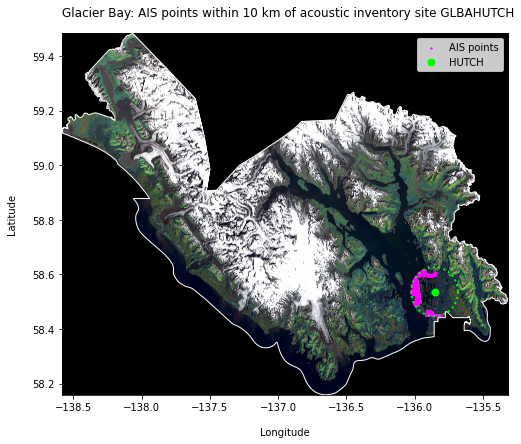

	Attempting to create SRCID.txt guide for annotation.
================ now working on MMSI 235088016 ================ 

MMSI 235088016 event #1
this will be srcID 1.223
Alaska [enter/exit]: 2020-08-11 23:00:37 / 2020-08-12 14:48:04
Vehicle within radius for 0 days 15:47:27

================ now working on MMSI 244058902 ================ 

MMSI 244058902 event #1
this will be srcID 0.903
Alaska [enter/exit]: 2020-08-23 15:23:55 / 2020-08-23 16:16:24
Vehicle within radius for 0 days 00:52:29

MMSI 244058902 event #2
this will be srcID 0.903
MMSI 244058902 event #3
this will be srcID 0.903
MMSI 244058902 event #4
this will be srcID 0.903
MMSI 244058902 event #5
this will be srcID 0.903
Alaska [enter/exit]: 2020-08-23 18:57:50 / 2020-08-23 19:10:40
Vehicle within radius for 0 days 00:12:50

MMSI 244058902 event #6
this will be srcID 0.903
Alaska [enter/exit]: 2020-08-23 19:25:41 / 2020-08-23 23:28:42
Vehicle within radius for 0 days 04:03:01

MMSI 244058902 event #7
this will be srcID 0.90

MMSI 368089260 event #18
this will be srcID 1.212
Alaska [enter/exit]: 2020-08-08 16:44:36 / 2020-08-08 19:01:36
Vehicle within radius for 0 days 02:17:00

MMSI 368089260 event #19
this will be srcID 1.212
Alaska [enter/exit]: 2020-08-10 11:47:41 / 2020-08-10 11:48:39
Vehicle within radius for 0 days 00:00:58

MMSI 368089260 event #20
this will be srcID 1.212
Alaska [enter/exit]: 2020-08-10 17:36:39 / 2020-08-10 17:42:10
Vehicle within radius for 0 days 00:05:31

MMSI 368089260 event #21
this will be srcID 1.212
Alaska [enter/exit]: 2020-08-10 18:04:39 / 2020-08-10 18:22:39
Vehicle within radius for 0 days 00:18:00

MMSI 368089260 event #22
this will be srcID 1.212
Alaska [enter/exit]: 2020-08-11 08:01:02 / 2020-08-11 08:18:33
Vehicle within radius for 0 days 00:17:31

MMSI 368089260 event #23
this will be srcID 1.212
Alaska [enter/exit]: 2020-08-11 17:59:32 / 2020-08-11 18:30:33
Vehicle within radius for 0 days 00:31:01

MMSI 368089260 event #24
this will be srcID 1.212
Alaska [enter/

Vehicle within radius for 0 days 00:03:00

MMSI 368089270 event #12
this will be srcID 1.156
Alaska [enter/exit]: 2020-08-05 15:38:52 / 2020-08-05 15:43:21
Vehicle within radius for 0 days 00:04:29

MMSI 368089270 event #13
this will be srcID 1.156
Alaska [enter/exit]: 2020-08-05 16:04:51 / 2020-08-05 16:07:52
Vehicle within radius for 0 days 00:03:01

MMSI 368089270 event #14
this will be srcID 1.156
Alaska [enter/exit]: 2020-08-06 15:21:53 / 2020-08-06 15:30:52
Vehicle within radius for 0 days 00:08:59

MMSI 368089270 event #15
this will be srcID 1.156
Alaska [enter/exit]: 2020-08-06 15:48:54 / 2020-08-06 15:59:23
Vehicle within radius for 0 days 00:10:29

MMSI 368089270 event #16
this will be srcID 1.156
Alaska [enter/exit]: 2020-08-06 20:28:23 / 2020-08-06 20:35:52
Vehicle within radius for 0 days 00:07:29

MMSI 368089270 event #17
this will be srcID 1.156
Alaska [enter/exit]: 2020-08-07 08:19:22 / 2020-08-07 08:27:47
Vehicle within radius for 0 days 00:08:25

MMSI 368089270 event 

================ now working on MMSI 369150000 ================ 

MMSI 369150000 event #1
this will be srcID 1.258
Alaska [enter/exit]: 2020-08-01 14:49:22 / 2020-08-01 22:09:42
Vehicle within radius for 0 days 07:20:20

MMSI 369150000 event #2
this will be srcID 1.258
Alaska [enter/exit]: 2020-08-02 07:58:11 / 2020-08-02 08:04:48
Vehicle within radius for 0 days 00:06:37

================ now working on MMSI 369970398 ================ 

MMSI 369970398 event #1
this will be srcID 1.011
Alaska [enter/exit]: 2020-08-03 08:17:37 / 2020-08-03 08:21:08
Vehicle within radius for 0 days 00:03:31

MMSI 369970398 event #2
this will be srcID 1.011
Alaska [enter/exit]: 2020-08-03 12:14:13 / 2020-08-03 12:42:01
Vehicle within radius for 0 days 00:27:48

MMSI 369970398 event #3
this will be srcID 1.011
Alaska [enter/exit]: 2020-08-04 08:58:14 / 2020-08-04 09:16:04
Vehicle within radius for 0 days 00:17:50

MMSI 369970398 event #4
this will be srcID 1.011
Alaska [enter/exit]: 2020-08-05 16:25:35 / 2

MMSI 369970398 event #76
this will be srcID 1.011
Alaska [enter/exit]: 2020-08-28 08:43:40 / 2020-08-28 10:26:44
Vehicle within radius for 0 days 01:43:04

MMSI 369970398 event #77
this will be srcID 1.011
Alaska [enter/exit]: 2020-08-28 11:28:22 / 2020-08-28 11:39:21
Vehicle within radius for 0 days 00:10:59

MMSI 369970398 event #78
this will be srcID 1.011
MMSI 369970398 event #79
this will be srcID 1.011
MMSI 369970398 event #80
this will be srcID 1.011
Alaska [enter/exit]: 2020-09-01 12:49:22 / 2020-09-01 13:02:22
Vehicle within radius for 0 days 00:13:00

MMSI 369970398 event #81
this will be srcID 1.011
Alaska [enter/exit]: 2020-09-01 14:57:15 / 2020-09-01 15:08:41
Vehicle within radius for 0 days 00:11:26

MMSI 369970398 event #82
this will be srcID 1.011
Alaska [enter/exit]: 2020-09-02 13:29:02 / 2020-09-02 14:04:24
Vehicle within radius for 0 days 00:35:22

MMSI 369970398 event #83
this will be srcID 1.011
Alaska [enter/exit]: 2020-09-03 08:44:17 / 2020-09-03 08:56:23
Vehicle

In [2]:
# ============ define global variables =============================================================

# which drive are the acoustic data on?
ds = iyore.Dataset(r"E:")

detection_distance = 10 #km
unit = "GLBA"
site = "HUTCH"
year =  2020

AIS_data_location = r"C:\Users\DBetchkal\Documents\ArcGIS\Projects\GLBA_AIS_20200925\GLBA_20200901 to 20201001"
GLBA_outline = r"C:\Users\DBetchkal\Documents\ArcGIS\Projects\GLBA_AIS_20200925\GLBAOutline.shp"

print("Now compiling AIS points within", detection_distance, "kilometers of", unit+site+str(year)+":")

# ============ initialize the major spatial objects =================================================

# a circular buffer around the site to use as a mask
mask = create_circular_site_buffer(ds, unit, site, year, 
                                   search_within_km = detection_distance)  

print("\tCircular mask created around site.")

print("\tLoading AIS points into memory. This may take a while...")

# AIS points: (within circular buffer)
AIS_points_within = load_AIS_from_csv(AIS_data_location, 
                                      column_convention="raw", 
                                      mask=mask)

print("\tAIS points have been spatially filtered to within circular mask.")

# AIS points: (within circular buffer & within microphone deployment period)
AIS_points_intersect, lat, long = tracks_within_acoustic_record(ds, unit, site, year, 
                                                                AIS_points_within)

print("\tFull spatio-temporal filtering has been completed.")

# =========== plot the AIS records overlapping the microphone deployment in space and time ===========

fig, tracks = plt.subplots(1, 1, figsize=(8, 8), facecolor='white')

# draw all the points
AIS_points_intersect.plot(markersize=2, ax=tracks, color="magenta", zorder=1, label="AIS points")

# add the site as a bright green point
tracks.plot(long, lat, ls="", marker="o", markersize=7, zorder=2, 
            color="lime", label=site)

# load the park outline for visual reference
GLBA = gpd.read_file(GLBA_outline)
GLBA.plot(ax=tracks, color='None', edgecolor='white', zorder=5)

# draw the buffer for visual reference and scale
gpd.GeoSeries([mask], crs="EPSG:4326").plot(ax=tracks, color='None', edgecolor="lime", 
                                              ls=":", lw=2, zorder=6)

# load the satellite imagery
im, transformer = satellite_basemap(mask=GLBA.loc[0, 'geometry'])
rasterio.plot.show(im, ax=tracks, transform=transformer, zorder=-5)

# this will create an approximately square plot
tracks.set_aspect(aspect=2)

plt.title("Glacier Bay: AIS points within "+str(detection_distance)+" km of acoustic inventory site GLBA"+site,
          loc="left", y=1.03)

plt.xlabel("Longitude", labelpad=15)
plt.ylabel("Latitude", labelpad=15)
plt.legend()
plt.show()

# =========== save a SRCID file indicating approximate timing of expected events ===========

print("\tAttempting to create SRCID.txt guide for annotation.")

# where should results be saved?
savePath = r"C:\Users\DBetchkal\Documents\ArcGIS\Projects\GLBA_AIS_20200925\ComputationalOutputs"

# create a SRCID.txt file that can be used with 
# NPS Sound Pressure Level Annotation Tool
create_SRCID_from_AIS(site, AIS_points_intersect, savePath)

print("Done!")

#### Code to develop a mapping: MMSI $\rightarrow$ srcID
Importantly, this is saved as a static file **for later reuse** so <font color="magenta"> it doesn't need to be re-run </font>

In [ ]:
# source_type = "vessel"
# layerMap = {"aircraft":0, "vessel":1}

# # load the tracks from Whitney's geodatabase
# tracks = gpd.read_file(r"C:\Users\DBetchkal\Documents\ArcGIS\Projects\GLBA_AIS_20200925\AIS_July2020.gdb", 
#                        layer=layerMap[source_type]) 

# MMSI_0701_2020 = tracks["MMSI"]

# %store -r MMSI_0901to1001_2020 
# # from "2021 02 26 reading in raw AIS data from Alaska Marine Exchange.ipynb"

# MMSI_2020 = np.append(MMSI_0901to1001_2020, MMSI_0701_2020)

# u, c = np.unique(MMSI_2020, return_counts=True)

# srcIDs = ["{0:.3f}".format(n/1000) for n in np.arange(len(u))]

# MMSI = pd.DataFrame([c], columns=u, index=["2020 point count"]).T
# MMSI = MMSI.sort_values("2020 point count")
# MMSI["srcID"] = srcIDs

# MMSI.to_csv(r"T:\ResMgmt\WAGS\Sound\Experiments & Data\2020 GLBA Acoustic Inventory\MMSI_to_srcID.csv",
#            index_label="MMSI")